<a href="https://colab.research.google.com/github/LABOSO123/Contribute-To-This-Project/blob/master/HACKATHON%20mpesa_statement%20review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
from numpy import int64
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import datetime as datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()





In [111]:
#import the mpesa dataset and view rows
df = pd.read_csv('mpesa_statement.csv',encoding = 'ISO-8859-1')
df.head()


,Receipt No.,Completion Time,Details,Transaction Status,Paid In,Withdrawn,Balance
0,RIL7CTQXWF,9/21/2023 13:02,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,NaN,-45,0
1,RIL7CTQXWF,9/21/2023 13:02,OverDraft of Credit Party,Completed,45,NaN,45
2,RIL5C7UVEV,9/21/2023 9:14,Merchant Payment Fuliza M-Pesato 7078150 - Eri...,Completed,NaN,-50,0
3,RIL5C7UVEV,9/21/2023 9:14,OverDraft of Credit Party,Completed,31.74,NaN,50
4,RIL2C7Q3CW,9/21/2023 9:13,Merchant Payment to 7078150 -Erick Wachira Kabui,Completed,NaN,-85,18.26


In [112]:
df.dtypes

Receipt No.           object
Completion Time       object
Details               object
Transaction Status    object
Paid In               object
Withdrawn             object
Balance               object
dtype: object

In [113]:
df.fillna(0, inplace=True)

In [114]:
for index, value in enumerate(df['Paid In']):
  if isinstance(value,str):
     try:

      rounded_value = int(float(value))

      df.at[index, 'Paid In']= rounded_value

     except ValueError:

      print(f"Value at index{index} is not convertible to a float:{value}")

  elif isinstance(value,float):
    df.at[index, 'Paid In']=round(value)

Value at index11 is not convertible to a float:6,550.00
Value at index44 is not convertible to a float:2,400.00
Value at index54 is not convertible to a float:1,200.00
Value at index88 is not convertible to a float:10,000.00
Value at index103 is not convertible to a float:Paid In
Value at index135 is not convertible to a float:1,910.00
Value at index137 is not convertible to a float:1,000.00
Value at index157 is not convertible to a float:1,000.00
Value at index180 is not convertible to a float:1,000.00
Value at index201 is not convertible to a float:1,000.00
Value at index217 is not convertible to a float:12,000.00
Value at index231 is not convertible to a float:1,500.00
Value at index240 is not convertible to a float:5,000.00
Value at index243 is not convertible to a float:1,000.00
Value at index247 is not convertible to a float:10,000.00
Value at index250 is not convertible to a float:1,000.00
Value at index259 is not convertible to a float:2,500.00
Value at index263 is not converti

In [115]:
row_index=103

df=df.drop(row_index)

In [116]:
clm='Receipt No.'

In [117]:
column_to_drop = 'Receipt No.'
df = df.drop(column_to_drop, axis=1)

In [118]:
df.isnull().sum()

Completion Time       0
Details               0
Transaction Status    0
Paid In               0
Withdrawn             0
Balance               0
dtype: int64

In [119]:
def clean_and_convert(value):
  try:
    cleaned_value = ''.join(filter(str.isdigit, str(value)))
    return int(cleaned_value)

  except ValueError:
      return None

df['Paid In']= df['Paid In'].apply(clean_and_convert)
received_total = df['Paid In'].sum()
print(f"Total Amount Received in a month: {received_total} ")





Total Amount Received in a month: 7512907 


In [120]:
def clean_and_convert(value):
  try:
    cleaned_value=''.join(filter(str.isdigit,str(value)))
    return int(cleaned_value)

  except ValueError:
      return None

df['Withdrawn']= df['Withdrawn'].apply(clean_and_convert)

withdrawn_total = df['Withdrawn'].sum()
print(f"Total withdrawn in a month: {withdrawn_total} ")


Total withdrawn in a month: 6525837 


In [126]:
def clean_and_convert(value):
  try:
    cleaned_value=''.join(filter(str.isdigit,str(value)))
    return int(cleaned_value)

  except ValueError:
      return None

df['Balance']= df['Balance'].apply(clean_and_convert)

balances_total = df['Balance'].sum()
print(f"balance: {balances_total} ")

balance: 59747601 


In [121]:
import seaborn as sns

<Axes: xlabel='Completion Time', ylabel='Paid In'>

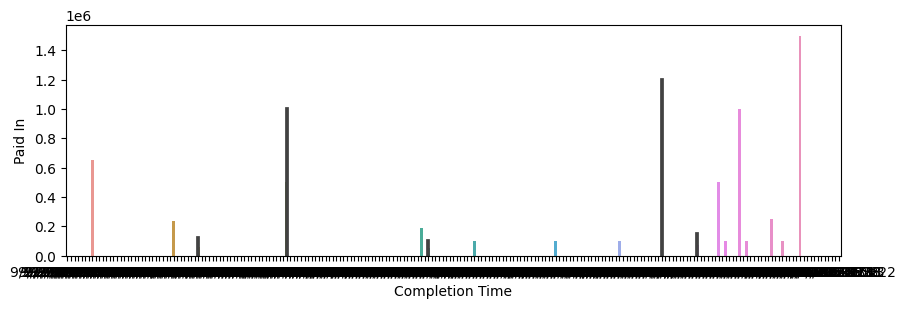

In [122]:
plt.figure(figsize=(10,3))
sns.barplot(data = df, x = 'Completion Time', y='Paid In')

<function matplotlib.pyplot.show(close=None, block=None)>

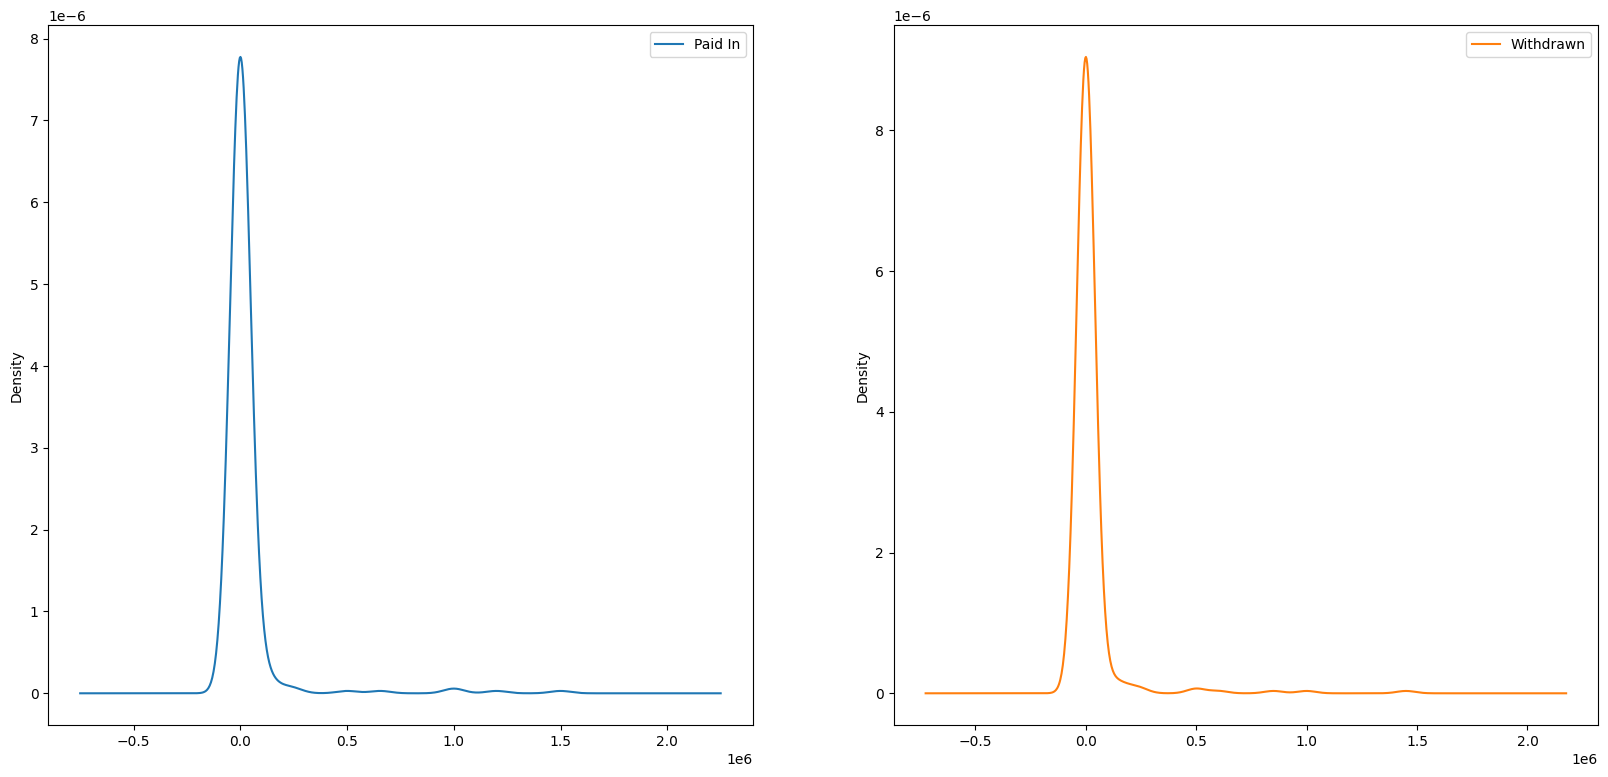

In [124]:
df.plot(kind='density',  subplots=True, layout=(2,2), sharex=False)
plt.gcf().set_size_inches((20,20))
plt.show

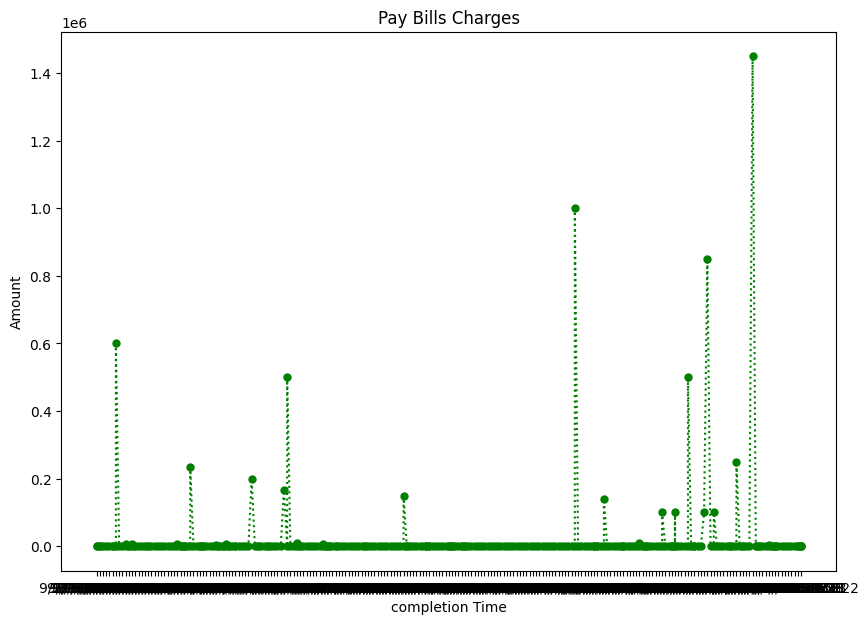

In [125]:
plt.figure(figsize=(10,7))
plt.title('Pay Bills Charges')
plt.xlabel('completion Time')
plt.ylabel('Amount')

plt.plot(df['Completion Time'],df.Withdrawn, color='green', marker='.', markersize=10, linestyle='dotted')
plt.show()